In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

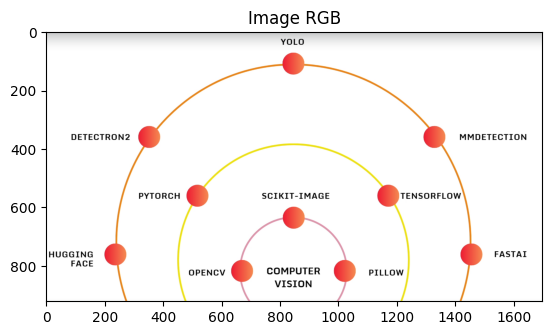

In [13]:
image=cv2.imread("./Images/Connection between Scikit Image, Open CV, Pillow, TF,Torch, YOLO.png")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Image RGB")
plt.show()

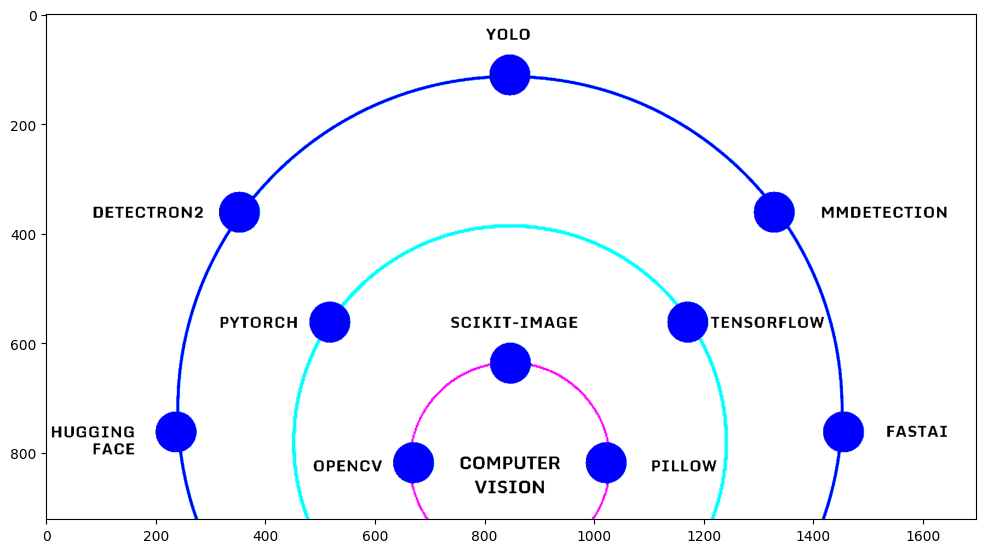

In [14]:
val,binary=cv2.threshold(image,150,255,cv2.THRESH_BINARY)
plt.figure(figsize=(12,7))
plt.imshow(binary,cmap="grey")
plt.show()

### Adaptive thresholding

In [15]:
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

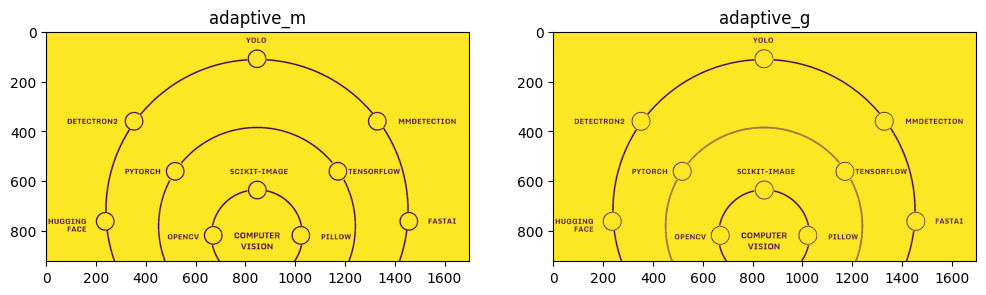

In [16]:
adaptive_m=cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,9)
adaptive_g=cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,9)
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(adaptive_m)
plt.title("adaptive_m")
plt.subplot(1,2,2)
plt.imshow(adaptive_g)
plt.title("adaptive_g")
plt.show()

### kmeans clustering

In [17]:
pixel_values=image_rgb.reshape((-1,3))

In [18]:
pixel_values=np.float32(pixel_values)

In [19]:
print(pixel_values)

[[190. 191. 192.]
 [190. 191. 193.]
 [190. 191. 192.]
 ...
 [247. 247. 247.]
 [247. 247. 247.]
 [247. 247. 247.]]


In [20]:
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
k=3
_,labels,centers=cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [21]:
print(labels.shape)
print(centers)

(1565556, 1)
[[253.8563    253.7974    253.60982  ]
 [231.8376    114.14342    66.51964  ]
 [  9.710091    9.718955    9.7342615]]


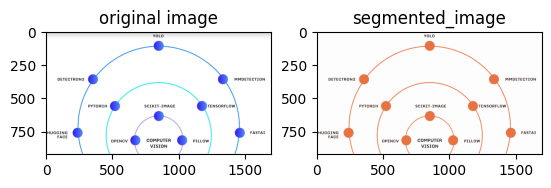

In [22]:
centers=np.uint8(centers)
segmented_image=centers[labels.flatten()]
segmented_image=segmented_image.reshape(image.shape)

plt.Figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("original image")

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("segmented_image")

plt.show()

### watershed algorithm